In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 8
from vega_datasets import data

In [29]:
data.list_datasets()

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2-concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare-dependencies',
 'flights-10k',
 'flights-200k',
 'flights-20k',
 'flights-2k',
 'flights-3m',
 'flights-5k',
 'flights-airport',
 'gapminder',
 'gapminder-health-income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa-electricity',
 'iris',
 'jobs',
 'la-riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal-2d',
 'obesity',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment-across-industries',
 'us-10m',
 'us-employment',
 'us-state-capitals',
 'weather',
 'weball26',
 'wheat',
 'world-110m',
 'zipcodes']

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [5]:
df = df.set_index('date').sort_index()

In [6]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [7]:
daily_mean_df = df.resample('D').mean()

In [8]:
daily_mean_df

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


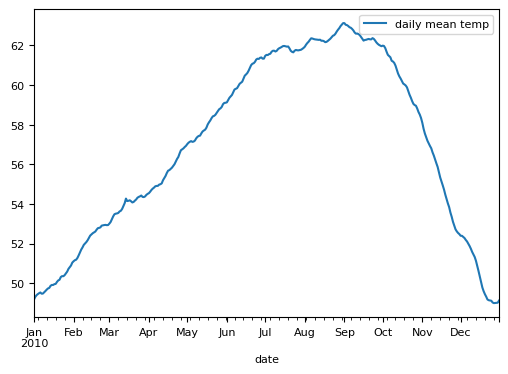

In [9]:
daily_mean_df.temp.plot(label='daily mean temp')
plt.legend()
plt.show()

In [10]:
daily_min_df = df.resample('D').min()

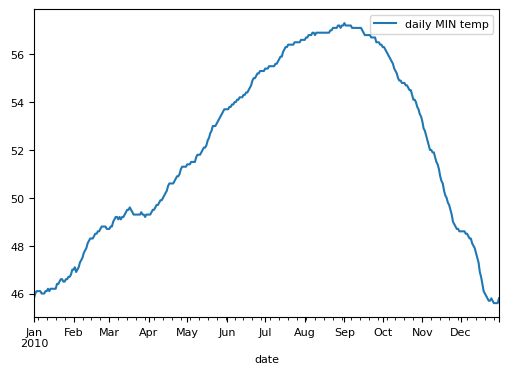

In [11]:
daily_min_df.temp.plot(label='daily MIN temp')
plt.legend()
plt.show()

In [12]:
daily_max_df = df.resample('D').max()

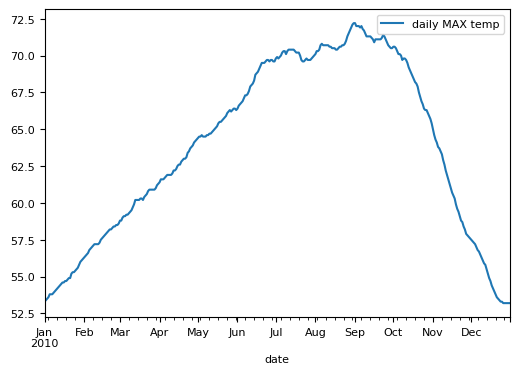

In [13]:
daily_max_df.temp.plot(label='daily MAX temp')
plt.legend()
plt.show()

In [14]:
monthly_mean_df = df.resample('M').mean()

In [15]:
monthly_mean_df.sort_values(['temp']) # January 2010 was coldest month

,temp
date,
2010-01-31,49.984140
2010-12-31,50.498253
2010-02-28,52.243899
2010-03-31,53.956528
2010-11-30,55.185139
2010-04-30,55.633056
2010-05-31,57.970968
2010-10-31,60.253091
2010-06-30,60.444722


In [16]:
monthly_mean_df.sort_values(['temp'],ascending=False) # Sept has highest avg temp

,temp
date,
2010-09-30,62.487083
2010-08-31,62.405376
2010-07-31,61.765457
2010-06-30,60.444722
2010-10-31,60.253091
2010-05-31,57.970968
2010-04-30,55.633056
2010-11-30,55.185139
2010-03-31,53.956528


In [17]:
daily_diff_df = df.resample('D').agg(['min','max'])

In [18]:
daily_diff_df.temp.max

<bound method NDFrame._add_numeric_operations.<locals>.max of              min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]>

In [19]:
daily_diff_df.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [20]:
daily_diff_df['max_temp'] = daily_diff_df.temp['max']
daily_diff_df['min_temp'] = daily_diff_df.temp['min']

In [21]:
daily_diff_df['diff'] = daily_diff_df.max_temp - daily_diff_df.min_temp

In [22]:
daily_diff_df.head()

temp       max_temp min_temp diff
             min   max                       
date                                         
2010-01-01  45.8  53.3     53.3     45.8  7.5
2010-01-02  46.0  53.4     53.4     46.0  7.4
2010-01-03  46.1  53.5     53.5     46.1  7.4
2010-01-04  46.1  53.6     53.6     46.1  7.5
2010-01-05  46.1  53.8     53.8     46.1  7.7

In [23]:
daily_diff_by_month = daily_diff_df.resample('M').mean()

In [25]:
daily_diff_by_month.drop(columns='temp',inplace=True)

In [28]:
daily_diff_by_month.sort_values(['diff'],ascending=False) # Sept greatest daily temp variability

,max_temp,min_temp,diff
,,,
date,,,
2010-09-30,71.306667,56.903333,14.403333
2010-07-31,70.022581,56.045161,13.977419
2010-06-30,68.430000,54.480000,13.950000
2010-08-31,70.812903,56.941935,13.870968
2010-10-31,68.364516,54.932258,13.432258
2010-05-31,65.312903,52.403226,12.909677
2010-04-30,62.646667,50.326667,12.320000
2010-03-31,60.093548,49.238710,10.854839
